The $k$-Means Algorithm
====================

[Кластериза́ція ме́тодом k-сере́дніх](https://uk.wikipedia.org/wiki/Кластеризація_методом_к–середніх) (англ. k-means clustering) — популярний метод кластеризації, — впорядкування множини об'єктів в порівняно однорідні групи. Винайдений в 1950-х роках математиком Гуґо Штайнгаузом і майже одночасно Стюартом Ллойдом. Особливу популярність отримав після виходу роботи МакКвіна.

Мета методу — розділити n спостережень на k кластерів, так щоб кожне спостереження належало до кластера з найближчим до нього середнім значенням. Метод базується на мінімізації суми квадратів відстаней між кожним спостереженням та центром його кластера, тобто функції

$$\displaystyle \,\sum _{i=1}^{N}d(x_{i},m_{j}\,(x_{i}))^{2}\ $$
де d — метрика, $\displaystyle x_{i}$ — і-ий об'єкт даних, а $\displaystyle m_{j}(x_{i})$ — центр кластера, якому на j-ій ітерації приписаний елемент $\displaystyle x_{i}$.


In [2]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Розглянемо роботу алгоритму на певних даних для пошуку двох кластерів серед них:

In [32]:
x = [-3,1,2,3,5,6,7]
y = [3,4,6,8,2,11,1]

Щоб знайти координати [центроїду](https://uk.wikipedia.org/wiki/Центроїд) цих даних потрібно знайти середнєарифметичне даних координат:

In [33]:
print(np.mean(x), np.mean(y))

3.0 5.0


Розрахунок відстані від точки до точки (центроїду) розраховується за формулою:

$$AB = \sqrt{{(x_b-x_a)}^2 + {(y_b-y_a)}^2 + {(z_b-z_a)}^2}$$

Спробую реалізувати даний підхід для пошуку двох кластерів серед наведених даних:

In [34]:
def get_centroid(lst):
    """Повертає середнє арифметичне вхідного списку"""
    return [np.mean(i) for i in zip(*lst)]

def get_distance(cor, cor_centroid):
    """Повертає відстань між ДВОМА координатами за наведеною вище формулою"""
    return np.sqrt((cor[0] - cor_centroid[0])**2 + (cor[1] - cor_centroid[1])**2)

def get_klasres(klaster_a, klaster_b, x,y):
    """Повертає два списки координат які мають найменшу відстань між собою"""
    a_centroid = get_centroid(klaster_a)
    b_centroid = get_centroid(klaster_b)
    klaster_a.clear()
    klaster_b.clear()
    for i,j in zip(x,y):
        try:
            a_length = get_distance([i,j], a_centroid)
            b_length = get_distance([i,j], b_centroid)
        except IndexError:
            pass
        if a_length < b_length:
            klaster_a.append(tuple([i,j]))
        else:
            klaster_b.append(tuple([i,j]))
    return klaster_a, klaster_b

def cluster_search(x,y):
    """Повертає два списки координат які мають найменшу відстань
    кожен випадок розраховується з випрадковими початковими координатами"""
    klaster_a = [(np.random.choice(x), np.random.choice(y))]
    klaster_b = [(np.random.choice(x), np.random.choice(y))]
    c_a = 0
    c_b = 0
    while c_a != get_centroid(klaster_a) or c_b != get_centroid(klaster_b):
        klaster_a, klaster_b = get_klasres(klaster_a, klaster_b, x,y)
        c_a = get_centroid(klaster_a)
        c_b = get_centroid(klaster_b)
    return klaster_a, klaster_b

def list_duplicates_of(seq,item): # https://overcoder.net/q/151400/%D0%B8%D0%BD%D0%B4%D0%B5%D0%BA%D1%81-%D0%B4%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D0%B2-%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2-%D0%B2-%D1%81%D0%BF%D0%B8%D1%81%D0%BA%D0%B5-python
    """Повертає список вхідних індексів деякої величини item в спику seq"""
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs

def k_mean(x,y, n=200):
    """Повертає координати центроїдів кластерів з n=200 ітерацій"""
    coor = []
    while n>0:
        klaster_a, klaster_b = cluster_search(x,y)
        c_a = get_centroid(klaster_a)
        c_b = get_centroid(klaster_b)
        coor.append([c_a,c_b])
        n-=1

    d = {'count':0, 'c':0}
    for c in coor:
        length = list_duplicates_of(coor, c)
        if d['count'] < len(length):
            d['c'] = c
            d['count'] = len(length)
        else:
            pass
    return d['c']

a, b = k_mean(x,y)
print(a,b)

[1.8, 6.4] [6.0, 1.5]


Відобразимо ці кластеори:

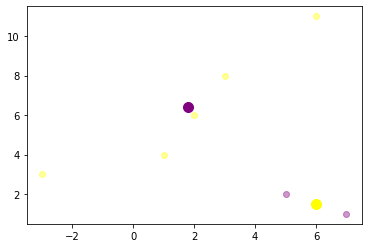

In [35]:
klaster_a = []
klaster_b = []
for i,j in zip(x,y):
    try:
        a_length = get_distance([i,j], a)
        b_length = get_distance([i,j], b)
    except IndexError:
        pass
    if a_length < b_length:
        klaster_a.append(tuple([i,j]))
    else:
        klaster_b.append(tuple([i,j]))

# Кластери
plt.scatter(list(zip(*klaster_a))[0],list(zip(*klaster_a))[1], color='yellow', alpha=0.4)
plt.scatter(list(zip(*klaster_b))[0],list(zip(*klaster_b))[1], color='purple', alpha=0.4)
# Центроїди кластерів
plt.scatter(a[0], a[1], s=100, color='purple')
plt.scatter(b[0], b[1], s=100, color='yellow')

Тепер проведемо відповідні розрахунки за допомогою вбудованоїфункції модулю sklearn:

[[2.4 3.2]
 [4.5 9.5]]


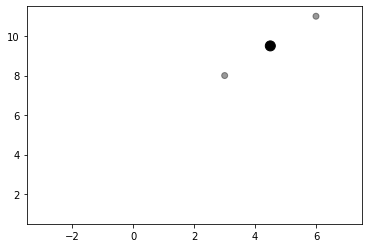

In [36]:
# ініціалізуємо модель KMeans з двома кластерами
kmeans = KMeans(n_clusters=2) # random_state=8
# Навчимо модель KMeans на нашому масиві з двома кластерами
Y_hat = kmeans.fit(list(zip(x,y))).labels_
# Побудуэмо на графіку наші кластери
plt.scatter(x, y, c=Y_hat, alpha=0.4)
# Побудуэмо на графіку центроїди кластерів
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))

# Виведемо координати центроїду даних кластерів
print(mu)

Приклад з 4 кластерами
====================

Знову ж таки, ми починаємо з генерації деяких штучних даних:

In [37]:
plt.jet() # set the color map. When your colors are lost, re-run this.
import sklearn.datasets as datasets
X, Y = datasets.make_blobs(centers=4, cluster_std=0.5, random_state=0)

<Figure size 432x288 with 0 Axes>

Як завжди, ми спочатку *наносимо* дані, щоб зрозуміти, з чим ми маємо справу:

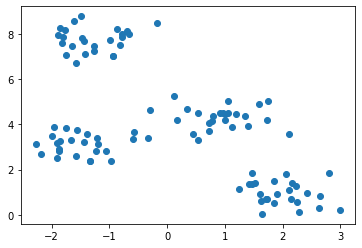

In [38]:
plt.scatter(X[:,0], X[:,1]);

Схоже, що дані можуть містити чотири різні «типи» точок даних.

Власне, так воно і було створено вище.

Ми також можемо нанести цю інформацію, використовуючи колір:

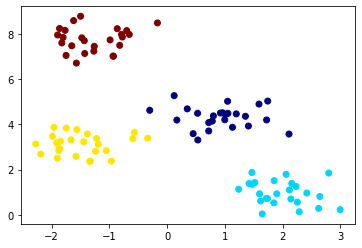

In [39]:
plt.scatter(X[:,0], X[:,1], c=Y);

Однак зазвичай ви не знаєте інформацію в «Y».

Ви можете спробувати відновити його лише за допомогою даних.

Це те, що робить алгоритм kMeans.

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=8)
Y_hat = kmeans.fit(X).labels_
Y_hat

array([3, 1, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 3, 1,
       0, 2, 3, 0, 0, 3, 2, 2, 2, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 0, 1, 0,
       0, 1, 2, 0, 3, 3, 3, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 1,
       0, 0, 2, 3, 1, 2, 3, 1, 3, 3, 0, 0, 2, 2, 2, 1, 0, 3, 2, 0, 2, 2,
       3, 3, 3, 0, 3, 0, 0, 1, 1, 0, 1, 3])

Тепер призначення міток мають бути схожими на `Y`, аж до іншого порядку кольорів:

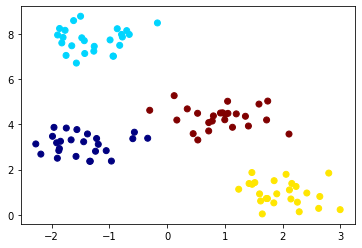

In [41]:
plt.scatter(X[:,0], X[:,1], c=Y_hat);

Часто вас не стільки цікавлять призначення коштів.

Ви захочете ближче розглянути значення $\mu$.

Середні в $\mu$ можна розглядати як *представників* відповідного кластера.

[[-1.47935679  3.11716896]
 [-1.26811733  7.76378266]
 [ 1.99186903  0.96561071]
 [ 0.92578447  4.32475792]]


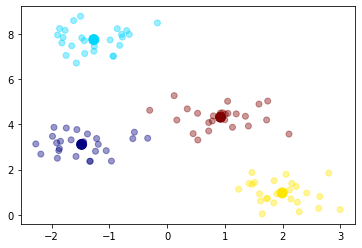

In [42]:
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
print(mu)

# Приклад застосування алгоритму на зображеннях
## $k$-Means on Images

У цьому останньому прикладі ми використовуємо алгоритм $k$-Means на класичному наборі даних MNIST.

Набір даних MNIST містить зображення рукописних цифр.

Давайте спочатку отримаємо набір даних з Інтернету (це може зайняти деякий час, зверніть увагу на зірочку [*]):

In [43]:
# from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)
X_digits, Y_digits = shuffle(X, y) # shuffle dataset (which is ordered!)
X_digits = X_digits[-5000:]       # take only the last instances, to shorten runtime of KMeans

In [44]:
# X_digits[0]

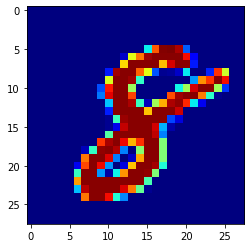

In [45]:
plt.imshow(X_digits[0].reshape(28,28))

Let's have a look at some of the instances in the dataset we just loaded:

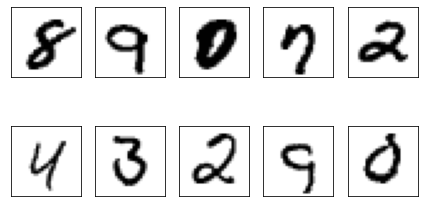

In [46]:
plt.rc("image", cmap="binary") # use black/white palette for plotting
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

**Warning**: This takes quite a few seconds, so be patient until the asterisk [*] disappears!

In [47]:
kmeans = KMeans(20)
mu_digits = kmeans.fit(X_digits).cluster_centers_
# mu_digits[0]

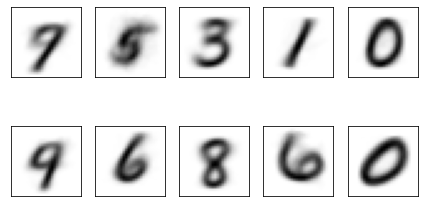

In [48]:
plt.rc("image", cmap="binary") # use black/white palette for plotting
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
# plt.imshow(mu_digits[0].reshape(28,28))

Let's have a closer look at the means. Even though there are 10 digits, some of them are over/under-represented. Do you understand why?

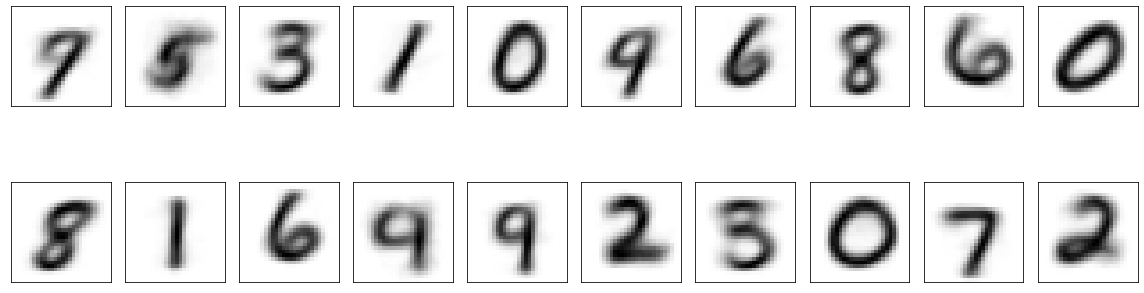

In [49]:
plt.figure(figsize=(16,6))
for i in np.arange(2*(mu_digits.shape[0]/2)): # loop over all means
    i = int(i)
    j = int(mu_digits.shape[0]/2)
    plt.subplot(2,j,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

# визначити оптимальну кількість кластерів

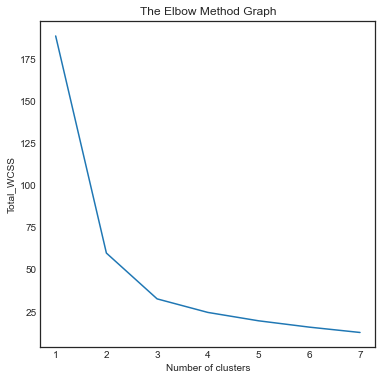

In [3]:
# Метод ліктя (elbow) на даних про пелюстки у python
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

plt.figure(figsize=(6, 6))
plt.style.use('seaborn-white')

# грузим данные 
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['sepal length (cm)','petal width (cm)']].values

# определяем необходимое количество кластеров
total_wcss=[]
n_clusters = 8

for i in range(1,n_clusters): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),total_wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Total_WCSS')
plt.show()

In [2]:
#!pip install rpy2
# Можна визначити оптимального числа кластерів скористатися пакетом NbClust:
# install.packages("NbClust")
# library(NbClust)
# data(iris)
# dt <- iris[, 1:4]
# N <- NbClust(dt, distance = "euclidean",
#              min.nc = 2, max.nc = 15, method = "complete", 
#              index = "alllong")

In [3]:
import rpy2.ipython
%load_ext rpy2.ipython

Unable to determine R home: [WinError 2] Не удается найти указанный файл
C:\Users\GbreH\Desktop\jupyter\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [ ]:
%%R

# install.packages("NbClust")
# library(NbClust)
data(iris)
dt <- iris[, 1:4]
N <- NbClust::NbClust(dt, distance = "euclidean",
             min.nc = 2, max.nc = 15, method = "complete", 
             index = "alllong")

--- Пожалуйста, выберите зеркало CRAN для использования в этой сессии ---


In [50]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans


# Почему-то теперь элементы массива(точки) должны быть float или double...
points = np.array([[1,2], [2,1], [2,2], [1,3], [6,7], [6,5], [7,8], [8,8]], dtype=float)

# Список найденных центроидов и дисперсия
centroids, disp = kmeans(points, 1)

# Перебираем найденные центроиды, метод <kmeans> всегда возвратит двумерный массив
# оба параметра метода <cdist> должны быть двумерными массивами
results = ( sum(cdist(points, [centroid,])**2) for centroid in centroids )


print( list(results) )

[array([116.875])]


[1, 2, 3, 4, 5, 6]
None


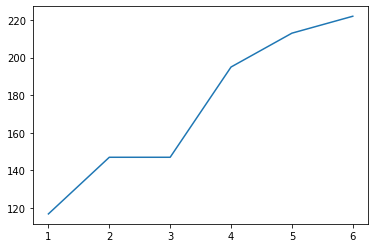

In [67]:
x = list(range(1,len(points)-1))
y = []

for i in range(1,len(points)-1):
    centroids, disp = kmeans(points, i)
    results = list( sum(cdist(points, [centroid,])**2) for centroid in centroids )
    y.append(results)
    
yy = [float(i[0]) for i in y]    
print(x)
print(yy.sort())
plt.plot(x,yy)

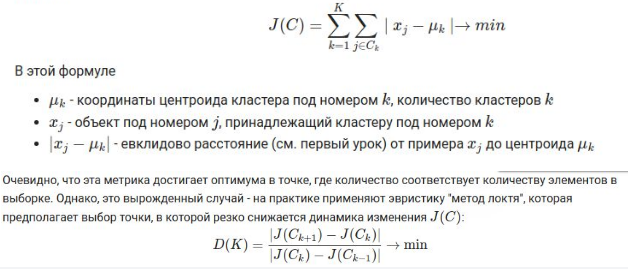

In [4]:
# Пітоністам важливо розуміти як кожен із аналізованих методів реалізується на Пітоні

from sklearn.cluster import KMeans
import numpy as np

# Запишемо координати точок у вигляді масиву numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]] )
# Навчимо модель KMeans на нашому масиві з одним кластером
kmeans = KMeans(n_clusters=1).fit(X)
# Виведемо координати центроїду даного кластера
print(kmeans.cluster_centers_)
# Виведемо суму квадратів відстаней точок від центроїду = аттрибут моделі kmeans
print(kmeans.inertia_)

[[3. 5.]]
146.0
